Text(0.5, 1.0, 'Top 5 Correlation Factors for 1984')

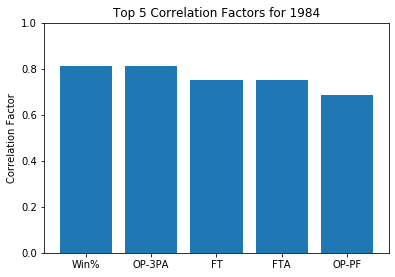

In [2]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import requests
import numpy as np
import pandas as pd
import operator
%matplotlib inline

plt.figure(figsize=(21, 55))

#Pulls data from website for each team and each year. Then creates an array with all of the data.
Team_List = ['ATL','BOS','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','KCK','LAL','MIL','NJN','NYK','PHI','PHO','POR','SAS','SDC','SEA','UTA','WSB']
n = 0
Year = '1984'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
    
#Array data is then transferred to a dataframe. Certain percentage stats are then calculated and input into the dataframe. Data is then normalized by the league averages.
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG%','OP-3P','OP-3PA','OP_3P%','OP-FT','OP-FTA','OP_FT%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']

#Playoff data is inserted. Who made the playoffs and who didn't.
Playoff_List = [True,True,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True,False,False,True,True,True]
DF.insert(1, "Playoff Birth", Playoff_List)

#The top 16 in each stat is collected and ran against the teams that made the playoffs. If all teams that are in the top 16 of the stat are the teams that made the playoffs. The correlation factor would be 100%.
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_1984 = DF

Top_Stat_Counter = {}
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
    

#Graphs are made of the top 5 correlation factors for each season.
plt.subplot(11, 3, 1)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))





In [ ]:
Top_Stat_Counter = {}
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1

In [35]:
print(Sorted_Factors)
print(Sorted_Factors.keys())
print(Top_Stat_Counter)

{'Win%': 0.8125, 'OP-3PA': 0.8125, 'FT': 0.75, 'FTA': 0.75, 'OP-PF': 0.6875}
dict_keys(['Win%', 'OP-3PA', 'FT', 'FTA', 'OP-PF'])
{'Win%': 1, 'OP-3PA': 1, 'FT': 1, 'FTA': 1, 'OP-PF': 1}


In [26]:
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter:
        print('A')
    else:
        print(key)

Win%
OP-3PA
FT
FTA
OP-PF


TypeError: unsupported operand type(s) for *: 'dict_values' and 'float'

In [7]:
WinPer_Year = {}
WinPer_Year[Year] = factor['Win%']


NameError: name 'factor' is not defined

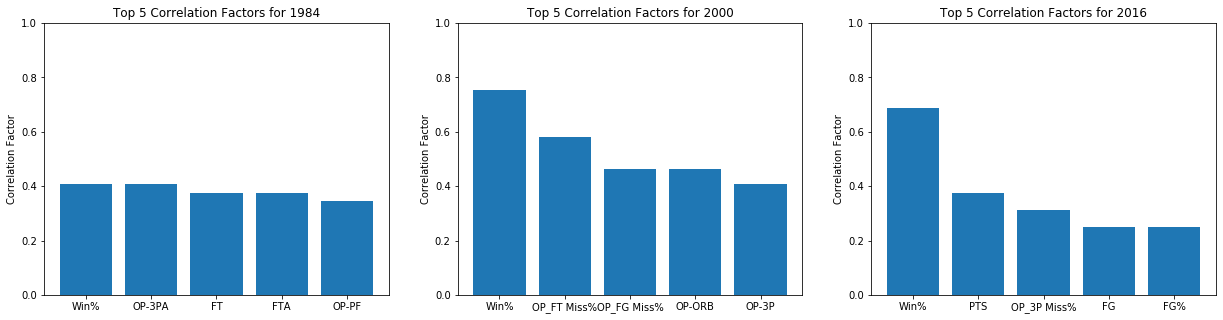

In [4]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import requests
import numpy as np
import pandas as pd
import operator
%matplotlib inline

plt.figure(figsize=(21, 5))


#Pulls data from website for each team and each year. Then creates an array with all of the data.
Team_List = ['ATL','BOS','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','KCK','LAL','MIL','NJN','NYK','PHI','PHO','POR','SAS','SDC','SEA','UTA','WSB']
n = 0
Year = '1984'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
    
#Array data is then transferred to a dataframe. Certain percentage stats are then calculated and input into the dataframe. Data is then normalized by the league averages.
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']

#Playoff data is inserted. Who made the playoffs and who didn't.
Playoff_List = [True,True,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True,False,False,True,True,True]
DF.insert(1, "Playoff Birth", Playoff_List)

#The top 16 in each stat is collected and ran against the teams that made the playoffs. If all teams that are in the top 16 of the stat are the teams that made the playoffs. The correlation factor would be 100%.
z = 0
x = list(DF.columns[5:])
factors = {}
WinPer_Year = {}
OP_FG_MissPer_Year = {}
Ast_Year = {}
FGPer_Year = {}
Three_Year = {}
ThreePer_Year = {}
OP_3P_MissPer_Year = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) *(7/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_1984 = DF

#Graphs are made of the top 5 correlation factors for each season.
plt.subplot(1, 3, 1)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','VAN','WAS']
n = 0
Year = '2000'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,False,True,False,False,False,False,True,False,False,True,False,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16)*(13/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2000 = DF
plt.subplot(1, 3, 2)

plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))
plt.savefig('TopFive_2000.png')


Team_List = ['ATL','BOS','BRK','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2016'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,False,True,False,True,True,False,True,True,True,True,True,False,True,True,False,False,False,False,True,False,False,False,True,False,True,True,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2016 = DF
plt.subplot(1, 3, 3)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))
plt.savefig('TopFive_W.png')
plt.show()

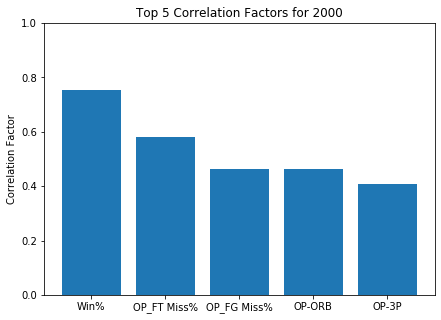

In [23]:
Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','VAN','WAS']
n = 0
Year = '2000'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,False,True,False,False,False,False,True,False,False,True,False,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (13/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2000 = DF
plt.figure(figsize=(7, 5))

plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))
plt.savefig('TopFive_2000.png')

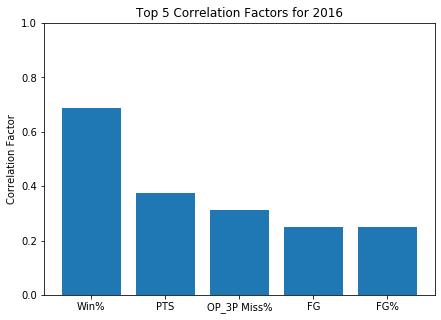

In [24]:

Team_List = ['ATL','BOS','BRK','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2016'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,False,True,False,True,True,False,True,True,True,True,True,False,True,True,False,False,False,False,True,False,False,False,True,False,True,True,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2016 = DF
plt.figure(figsize=(7, 5))
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))
plt.savefig('TopFive_2016.png')

In [2]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import requests
import numpy as np
import pandas as pd
import operator
%matplotlib inline
plt.figure(figsize = (20,6))


#plt.subplot(7, 1, 1)
z = np.polyfit(list(range(33)), list(WinPer_Year.values()), 1)
p = np.poly1d(z)
xp = np.linspace(0, 32, 33)
plt.plot(list(WinPer_Year.keys()),list(WinPer_Year.values()),xp, p(xp),'--')
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Correlation Factor for Win%')
plt.savefig('Correlation_F_WinPer.png')

NameError: name 'WinPer_Year' is not defined

<Figure size 1440x432 with 0 Axes>

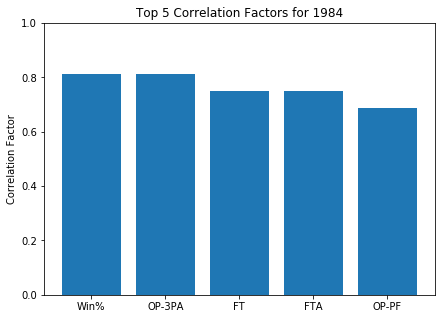

In [8]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import requests
import numpy as np
import pandas as pd
import operator
%matplotlib inline



#Pulls data from website for each team and each year. Then creates an array with all of the data.
Team_List = ['ATL','BOS','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','KCK','LAL','MIL','NJN','NYK','PHI','PHO','POR','SAS','SDC','SEA','UTA','WSB']
n = 0
Year = '1984'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
    
#Array data is then transferred to a dataframe. Certain percentage stats are then calculated and input into the dataframe. Data is then normalized by the league averages.
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']

#Playoff data is inserted. Who made the playoffs and who didn't.
Playoff_List = [True,True,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True,False,False,True,True,True]
DF.insert(1, "Playoff Birth", Playoff_List)

#The top 16 in each stat is collected and ran against the teams that made the playoffs. If all teams that are in the top 16 of the stat are the teams that made the playoffs. The correlation factor would be 100%.
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_1984 = DF

Top_Stat_Counter = {}
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1

#Graphs are made of the top 5 correlation factors for each season.
plt.figure(figsize=(7, 5))
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))
plt.savefig('TopFive_NoW_1984.png')


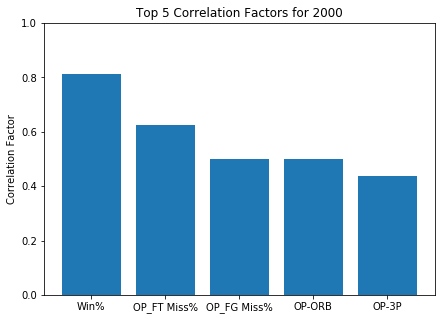

In [9]:
Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','VAN','WAS']
n = 0
Year = '2000'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,False,True,False,False,False,False,True,False,False,True,False,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_2000 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.figure(figsize=(7, 5))
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))
plt.savefig('TopFive_NoW_2000.png')



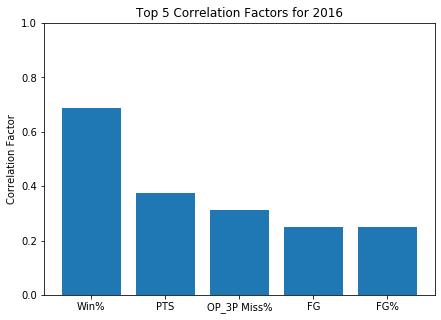

In [10]:
Team_List = ['ATL','BOS','BRK','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2016'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,False,True,False,True,True,False,True,True,True,True,True,False,True,True,False,False,False,False,True,False,False,False,True,False,True,True,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_2016 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.figure(figsize=(7, 5))
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))
plt.savefig('TopFive_NoW_2016.png')

In [12]:
pd.set_option('display.max_columns', None)
DF_2016

,Team,Playoff Birth,G,W,L,Win%,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS,OP-FG,OP-FGA,OP_FG Miss%,OP-3P,OP-3PA,OP_3P Miss%,OP-FT,OP-FTA,OP_FT Miss%,OP-ORB,OP-TRB,OP-AST,OP-STL,OP-BLK,OP-TOV,OP-PF,OP-PTS
0,ATL,True,1.143498,1.345291,0.941704,1.177308,1.019914,0.989678,1.030403,1.153846,1.141533,1.014038,0.983044,0.912104,1.076256,0.877026,0.948877,1.193156,1.137206,1.072822,0.994246,0.858825,1.024804,1.022147,1.006631,0.987950,1.066294,1.016095,0.972665,0.875453,0.814205,0.767530,0.973592,0.989461,1.090405,1.089558,1.047865,1.062557,0.943334,1.000100
1,BOS,True,1.076233,1.210762,0.941704,1.125801,1.033369,1.055181,0.979189,1.093750,1.196293,0.917224,0.885883,0.868876,1.018134,1.220210,1.012591,1.105287,1.384425,0.877763,1.077100,1.025683,1.011820,0.960280,0.973276,1.010821,0.850639,0.898530,1.028039,1.041389,1.065396,1.072581,1.059497,1.007658,0.942554,1.089558,1.047865,1.241950,0.987553,0.965166
2,BRK,False,0.941704,0.538117,1.345291,0.571835,1.033369,1.038507,0.994910,0.625000,0.707666,0.886026,0.868737,0.838617,1.034454,1.105815,1.048999,0.966548,1.063041,0.897269,1.049482,0.917716,0.971866,1.032906,1.011397,0.983295,1.150160,1.133660,0.991455,0.881175,0.909485,1.099396,0.935412,0.987186,1.136609,1.151465,1.261320,1.041858,0.884376,1.017068
3,CHI,True,0.807175,1.076233,0.538117,1.334283,0.990312,1.052799,0.940512,0.997596,0.930918,1.075074,0.931606,0.938040,0.991739,0.972355,1.085407,1.082164,0.778739,1.072822,0.849252,0.947162,0.979857,1.000628,1.069769,1.051594,0.958466,0.957313,0.998652,0.921228,0.957124,1.119294,1.135857,1.116840,0.942554,0.817169,1.222510,0.821067,0.864723,0.982134
4,CHO,False,1.008969,1.345291,0.672646,1.334283,1.022605,0.994442,1.028172,1.165865,1.124684,1.039951,1.023052,0.989914,1.032017,0.734032,0.969357,1.008170,0.902349,1.267880,0.821634,0.863733,1.034793,1.022147,1.026883,1.003872,0.922524,1.016095,1.048953,0.852565,0.831529,0.923321,0.906777,1.025855,1.081164,0.841931,0.795602,0.959062,1.036685,0.983132
5,CLE,True,0.941704,1.479821,0.403587,1.572548,1.022605,0.974196,1.049540,1.250000,1.175232,1.067042,0.977329,1.046110,0.932933,0.972355,1.037621,1.091414,0.716934,0.838752,0.994246,0.986422,1.033794,0.989868,0.991145,1.001229,0.910543,0.898530,0.992094,0.978447,0.978779,1.003320,0.916322,0.921222,0.965655,0.978126,0.853816,0.848666,1.080904,0.981136
6,DAL,True,1.076233,1.210762,0.941704,1.125801,0.979548,0.974196,1.005349,0.973558,1.090986,0.895236,1.103067,1.067723,1.031644,0.772164,0.973908,0.989672,0.914710,0.741222,0.959724,1.010960,0.999834,0.984488,1.005440,1.016773,1.006390,1.108467,1.048953,1.052832,1.043742,0.975087,1.030862,1.032679,0.928692,0.965745,0.892626,0.993560,1.154602,0.997105
7,DEN,False,1.076233,0.672646,1.479821,0.625445,0.968784,0.998015,0.970571,0.877404,0.951980,0.924628,1.017337,0.998559,1.017367,1.077216,0.980734,0.989672,0.914710,0.897269,1.035673,0.952069,0.969868,1.046355,0.987571,0.952877,1.210064,1.045486,0.914428,0.955560,0.983110,1.089710,0.944957,0.982637,1.159710,1.064796,1.319534,1.007360,1.036685,1.045014
8,DET,True,1.008969,0.807175,1.210762,0.800570,0.993003,1.044462,0.950595,0.949519,1.090986,0.873132,0.828729,0.963977,0.858485,1.306006,1.039897,0.804686,1.063041,0.663199,0.945915,0.927531,0.960879,0.995248,0.968511,0.978254,0.946486,0.877537,0.956939,0.898341,0.905154,1.025752,0.906777,1.012207,0.984137,0.978126,0.892626,1.083257,1.021946,0.974149
9,GSW,True,1.076233,2.152466,0.000000,2.001424,1.132939,1.013497,1.117690,1.622596,1.305813,1.246592,0.965898,0.959654,1.005086,1.029552,1.042172,1.378141,1.087763,1.287386,1.132336,1.020775,1.144665,1.011387,1.048326,1.028221,0.730831,0.852344,1.076167,1.035667,1.030749,0.987378,1.107222,0.953067,0.947174,1.213372,0.659767,1.021159,0.997380,0.993113


In [10]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import requests
import numpy as np
import pandas as pd
import operator
%matplotlib inline

plt.figure(figsize=(21, 55))

#Pulls data from website for each team and each year. Then creates an array with all of the data.
Team_List = ['ATL','BOS','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','KCK','LAL','MIL','NJN','NYK','PHI','PHO','POR','SAS','SDC','SEA','UTA','WSB']
n = 0
Year = '1984'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
    
#Array data is then transferred to a dataframe. Certain percentage stats are then calculated and input into the dataframe. Data is then normalized by the league averages.
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
#League_Sum = DF.sum(numeric_only = True)
#League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
#League_Avg = League_Avg.T
#DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']

#Playoff data is inserted. Who made the playoffs and who didn't.
Playoff_List = [True,True,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True,False,False,True,True,True]
DF.insert(1, "Playoff Birth", Playoff_List)
DF.to_pickle('DF_84')

#The top 16 in each stat is collected and ran against the teams that made the playoffs. If all teams that are in the top 16 of the stat are the teams that made the playoffs. The correlation factor would be 100%.
#z = 0
#x = list(DF.columns[5:])
#factors = {}
#for items in x:
   # z = 0
    #for team in DF[DF['Playoff Birth'] == False][items]:
      #  if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
      #      z+=1
    #factors[items] = (16-z)/16
#Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
#DF_1984 = DF

#Top_Stat_Counter = {}
#for key in Sorted_Factors.keys():
   # if key in Top_Stat_Counter.keys():
       # Top_Stat_Counter[key] += 1
   # else:
        #Top_Stat_Counter[key] = 1

#Graphs are made of the top 5 correlation factors for each season.
#plt.subplot(11, 3, 1)
#plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
#plt.ylim(0, 1)
#plt.ylabel('Correlation Factor')
#plt.title('Top 5 Correlation Factors for {}'.format(Year))##


<Figure size 1512x3960 with 0 Axes>

In [9]:
test_df = pd.read_pickle('DF_84')
test_df

,0,1,2,Win%,3,4,FG%,5,6,3P%,...,22,OP-FT Miss%,23,24,25,26,27,28,29,30
0,14.0,7.0,7.0,0.500000,39.4,80.4,0.490050,0.6,1.4,0.428571,...,33.2,0.256024,15.8,44.6,23.2,7.1,4.9,15.9,25.5,102.9
1,15.0,11.0,4.0,0.733333,44.2,87.7,0.503991,0.6,2.3,0.260870,...,27.3,0.238095,14.4,41.1,23.8,9.0,4.1,14.8,27.5,109.1
2,13.0,4.0,9.0,0.307692,41.0,88.4,0.463801,0.3,1.8,0.166667,...,34.0,0.211765,14.3,46.9,25.4,10.8,8.6,17.6,26.4,110.9
3,15.0,5.0,10.0,0.333333,41.6,86.0,0.483721,0.8,2.6,0.307692,...,32.7,0.262997,12.9,41.1,26.1,7.5,3.9,14.5,21.7,105.9
4,13.0,10.0,3.0,0.769231,42.4,89.3,0.474804,0.2,1.8,0.111111,...,25.8,0.240310,16.6,45.2,26.7,7.8,4.8,17.6,29.0,109.0
5,15.0,8.0,7.0,0.533333,48.1,99.7,0.482447,0.7,3.0,0.233333,...,34.7,0.230548,14.7,49.9,29.1,8.7,7.1,18.1,26.9,125.7
6,15.0,7.0,8.0,0.466667,43.3,93.7,0.462113,0.3,1.4,0.214286,...,33.7,0.240356,13.8,45.7,26.4,7.9,6.7,17.8,26.8,111.5
7,15.0,6.0,9.0,0.400000,40.2,91.5,0.439344,0.3,1.9,0.157895,...,31.3,0.233227,12.7,46.5,26.5,8.4,5.5,22.1,28.7,111.5
8,15.0,5.0,10.0,0.333333,44.6,91.5,0.487432,0.3,1.5,0.200000,...,35.5,0.253521,14.9,44.0,24.1,9.9,5.3,15.2,22.8,112.0
9,14.0,4.0,10.0,0.285714,40.4,85.7,0.471412,0.7,3.0,0.233333,...,31.4,0.245223,15.1,46.1,22.6,11.1,6.1,19.4,23.5,102.8


In [3]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import requests
import numpy as np
import pandas as pd
import operator
%matplotlib inline

errors = [12.5,18.75,25,18.75]
acc = [87.5,81.25,75,81.25]
Years = ['2017','2018','2019','Average']
ER_DF = pd.DataFrame(errors)
ER_DF.columns = ['Percent Error (%)']
ER_DF.insert(0,"Year",Years)
ER_DF.insert(1,'Accuracy(%)',acc)
ER_DF.to_pickle('Recent Pred')
ER_DF

,Year,Accuracy(%),Percent Error (%)
0,2017,87.50,12.50
1,2018,81.25,18.75
2,2019,75.00,25.00
3,Average,81.25,18.75
